## 1- Importing Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

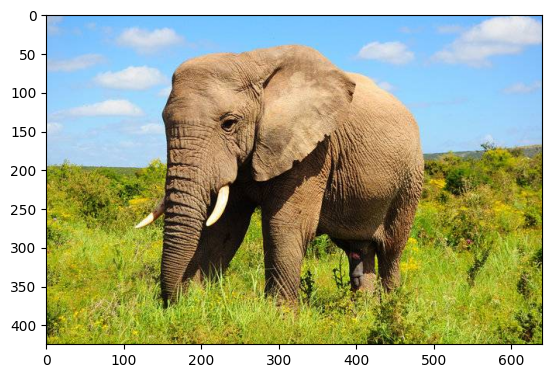

In [3]:
image = cv2.imread("images/elephant.jpg")
plt.imshow(image[...,::-1]);

## 3- Loading Labels from 'caffe' Model

In [9]:
rows = open("models/caffe/synset_words.txt").read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

classes

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

## 4- Making a blob from the Image

In [7]:
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))
blob.shape

(1, 3, 224, 224)

## 5- Building a Network with Models & Weights

In [12]:
net = cv2.dnn.readNetFromCaffe("models/caffe/bvlc_googlenet.prototxt", "models/caffe/bvlc_googlenet.caffemodel")

## 6- Introducing the Input to the Network

In [13]:
net.setInput(blob)

## 7- Model Output

In [14]:
preds = net.forward()
preds.shape

(1, 1000)

In [15]:
np.argmax(preds)

386

## 8- Show the Winning Class

In [16]:
idx = np.argmax(preds)
classes[idx]

'African elephant'

In [17]:
idxs = np.argsort(preds[0])[::-1][:3]

for idx in idxs:
    print(classes[idx])

African elephant
tusker
Indian elephant


In [18]:
idxs = np.argsort(preds[0])[::-1][:3]

for idx in idxs:
    print("{}:{:.2f}%".format(classes[idx], preds[0][idx]*100))

African elephant:82.85%
tusker:13.52%
Indian elephant:3.63%


## - Creating Network for Other Examples

In [21]:
#Load Labels
rows = open("models/caffe/synset_words.txt").read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

#Load network
net = cv2.dnn.readNetFromCaffe("models/caffe/bvlc_googlenet.prototxt", "models/caffe/bvlc_googlenet.caffemodel")

def predict(img):
    blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
    net.setInput(blob)
    preds = net.forward()
    idx = np.argmax(preds)
    return classes[idx], round(preds[0][idx]*100, 2)

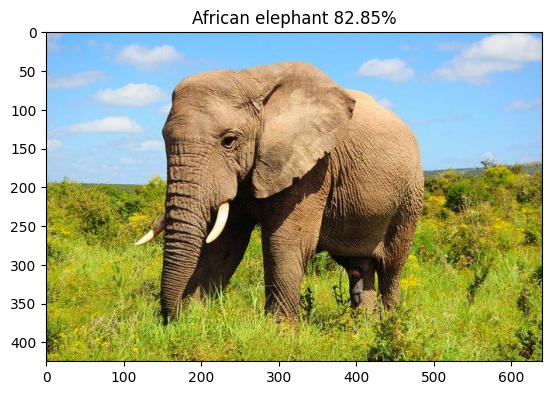

In [26]:
image = cv2.imread("images/elephant.jpg")
label, condidence = predict(image)

plt.imshow(image[...,::-1])
plt.title("{} {}%".format(label, condidence));

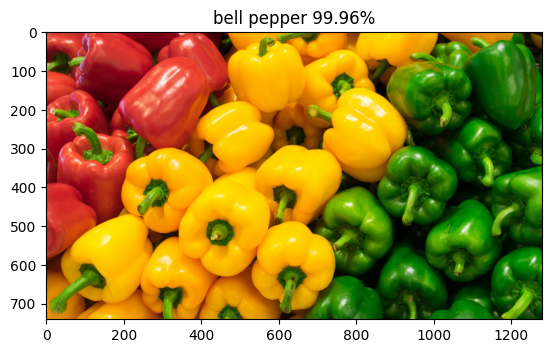

In [25]:
image = cv2.imread("images/felfel-dolme.jpg")
label, condidence = predict(image)

plt.imshow(image[...,::-1])
plt.title("{} {}%".format(label, condidence));

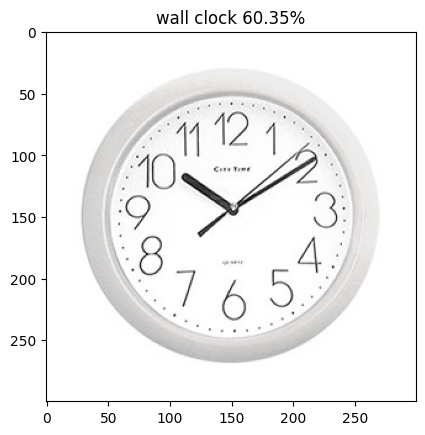

In [24]:
image = cv2.imread("images/clock.jpg")
label, condidence = predict(image)

plt.imshow(image[...,::-1])
plt.title("{} {}%".format(label, condidence));